# Simple pendulum using Lagrange's equation

Defines a LagrangianPendulum class that is used to generate basic pendulum plots from solving Lagrange's equations.

Revision history:
* 17-Mar-2019 by Dick Furnstahl (furnstahl.1@osu.edu).
* 30-April-2021 by Joseph Wintering (wintering.12@osu.edu).

A pendulum is attached to the bob of another pendulum. The origin is taken to be where the first pendulum is attached to he cieling, With caretesian coordinates: $\hat x$ to the right, and $\hat y$ pointing downward.

We can thus write the position of each pendulum as:

$\begin{align}
    x_1 = L_1 sin\phi_1 \newline
    y_1 = L_1 cos\phi_1 \newline
    x_2 = x_1 +L_2 sin\phi_2 \newline
    y_2 = y_1 + L_2 cos\phi_2
\end{align}$

## Euler-Lagrange equation

For a simple double pendulum, the Lagrangian with generalized coordinates $\phi_1$, $\phi_2$ is

$\begin{align}
  \mathcal{L} = \mathbf{T - U} = \frac12 (m_1 + m_2) L_1^2 \dot\phi_1^2 +\frac12 m_2 L_2^2 \dot\phi_2^2
  + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \cos(\phi_1-\phi_2)
  + (m_1 + m_2) g L_1 \cos\phi_1 + m_2 g L_2 \cos\phi_2
\end{align}$

The Euler-Lagrange equation for the first pendulum is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \quad\Longrightarrow\quad
 (m_1 + m_2) L_1 \ddot\phi_1 + m_2 L_2 \ddot\phi_2 \cos(\phi_1-\phi_2) + 
     m_2 L_2 \dot\phi_2^2 \sin(\phi_1 - \phi_2) + g (m_1 + m_2) \sin\phi_1
 =0
  \;.
\end{align}$

Similarly for $\phi_2$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = \frac{\partial\mathcal L}{\partial\phi_2}
 \quad\Longrightarrow\quad
    m_2 L_2^2 \ddot\phi_2^2 + m_2 L_1 \ddot\phi_1 \cos(\phi_1-\phi_2) - 
     m_2 L_1 \dot\phi_1^2 \sin(\phi_1 - \phi_2) + g m_2  \sin\phi_2
 =0
  \;.
\end{align}$

In [1]:
%matplotlib inline

In [19]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt 
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class LagrangianPendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L_1 : float
        length of the first simple pendulum
    L_2 : float
        length of the second simple pendulum
    g : float
        gravitational acceleration at the earth's surface
    m_1 : float
        mass of first pendulum
    m_2 : float
        mass of second pendulum
    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L_1=1., m_1=1., L_2=1., m_2=1., g=1.
                ):
        self.L_1 = L_1
        self.g = g
        self.m_1 = m_1
        self.L_2 = L_2
        self.m_2 = m_2
    
    def dy_dt_1(self, t, y):
        """
        This function returns the right-hand side of the Lagrange-Euler: 
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
            
        Returns
        -------
        
        """
        return [y[1], 
                (self.m_2 * self.g * np.sin(y[2]) * np.cos(y[0]-y[2]) \
                -self.m_2 * np.sin(y[0] - y[2]) * (self.L_1 * y[1]**2\
                 * np.cos(y[0]-y[2]) + self.L_2 * y[3]**2)\
                -(self.m_1+self.m_2) * self.g * np.sin(y[0]))\
                /(self.L_1 * (self.m_1+self.m_2* np.sin(y[0]-[2])**2)),
                y[3], 
                ( (self.m_1 + self.m_2) * (self.L_1 * y[1]**2 * np.sin(y[0]-y[2])\
                -self.g * np.sin(y[2]) + self.g * np.sin(y[0]) *np.cos(y[0]-y[2])) \
                +self.m_2 * self.L_2 * y[3]**2 * np.sin(y[0]-y[2]) * np.cos(y[0]-y[2]))\
                /(self.L_2 * (self.m_1+self.m_2* np.sin(y[0]-[2])**2))]
            

    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0,
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution1 = solve_ivp(self.dy_dt_1, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
       
        phi1, phi1_dot, phi2, phi2_dot = solution1.y
       
        return phi1, phi1_dot, phi2, phi2_dot

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plots 

In [7]:
# Labels for individual plot axes
phi1_vs_time_labels = (r'$t$', r'$\phi_1(t)$')
phi2_vs_time_labels = (r'$t$', r'$\phi_2(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L = 1.
g = 1.
mass = 1.

# Instantiate a pendulum 
p1 = LagrangianPendulum(L_1=L, m_1=mass, L_2=L, m_2=mass, g=g)

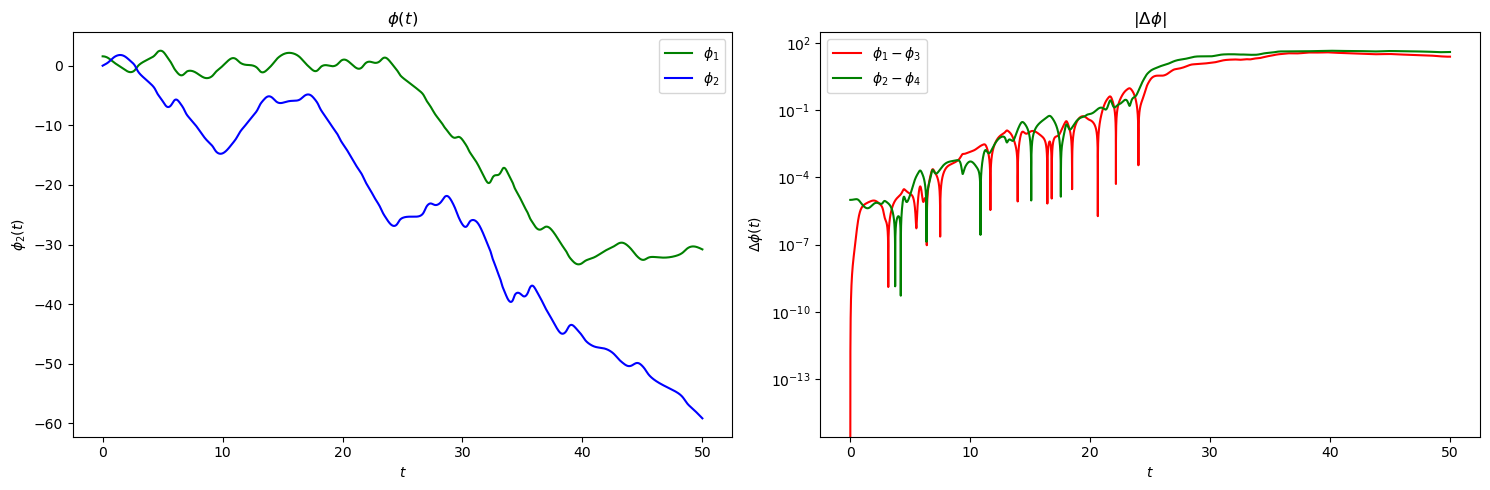

In [44]:
# both plots: same initial conditions
phi1_0 = np.pi/2.
phi1_dot_0 = 0.
phi2_0 = 0.0
phi2_dot_0 = np.pi/3.
phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)
#Add another pendulum system to check for chaos
phi3, phi3_dot, phi4, phi4_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0-0.00001, phi2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))

# first plot: phi_1 plot 
ax_a = fig.add_subplot(1,2,1)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi1_vs_time_labels, 
            color='green',
            label=r'$\phi_1$', 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
           
# second plot: phi_2 plot                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi2_vs_time_labels,
            color='blue',
            label=r'$\phi_2$', 
            title=r'$\phi(t)$', 
            ax=ax_a)    


#Compare difference in pendulum position to observe chaos
ax_c = fig.add_subplot(1,2,2)
start,stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start:stop], np.abs(phi1[start:stop]-phi3[start:stop]),
            color = 'red',
            semilogy=True,
            label = r'$\phi_1-\phi_3$',
            title = r'$\phi_1-\phi_2$',
            ax=ax_c)

start,stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start:stop], np.abs(phi2[start:stop]-phi4[start:stop]),
            axis_labels = (r'$t$', r'$\Delta\phi(t)$'),
            color = 'green',
            semilogy=True,
            label = r'$\phi_2-\phi_4$',
            title = r'|$\Delta\phi$|',
            ax=ax_c)
fig.tight_layout()
#fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  

As we can see in the left plot, $\phi_1$ and $\phi_2$ are the two angles of the motion of a double pendulum plotted against time. To check if the system is chaotic, a second set of pendulums was declared, $\phi_3$ and $\phi_4$ representing the relative angles, and the difference between the pendulums was plotted against time in the right plot. The inital conditions for both sets of pendulums are the same except for $\phi_4$ being released at an angle 0.00001 radians away from $\phi_2$. Although the two systems had almost the exact same initial conditions, the difference between the two sets of double pendulums position is completely dissimilar, illustrating how the system is chaotic beyond the small angle approximation.

Now animating the motion of the double pendulums:

In [23]:
def find_coordinates(x0,y0,theta,L):
    #Convert angle positions into cartesian coordinates
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    return x,y

In [45]:
%%capture
fig_animate = plt.figure(figsize=(5,5), num='Double Pendulum')
ax_animate = fig_animate.add_subplot(1,1,1)
ax_animate.set_xlim(-3,3)
ax_animate.set_ylim(-3,3)

x0=0.0
y0=0.0
start_animate, = ax_animate.plot(x0,y0,'o', markersize=5, color='black')
x1, y1 = find_coordinates(x0,y0,phi1[0],p1.L_1)
point1_animate, = ax_animate.plot(x1,y1,'o', markersize=10, color='blue')
line1_animate, = ax_animate.plot([x0,x1],[y0,y1], color='blue', lw=3)
x2,y2 = find_coordinates(x1,y1,phi2[0], p1.L_2)
point2_animate, = ax_animate.plot(x2,y2,'o', markersize=10, color='blue')
line2_animate, = ax_animate.plot([x1,x2],[y1,y2], color='blue', lw=3)

x1b, y1b = find_coordinates(x0,y0,phi3[0],p1.L_1)
point1b_animate, = ax_animate.plot(x1b,y1b,'o', markersize=10, color='red')
line1b_animate, = ax_animate.plot([x0,x1b],[y0,y1b], color='red', lw=3)
x2b,y2b = find_coordinates(x1b,y1b,phi4[0], p1.L_2)
point2b_animate, = ax_animate.plot(x2b,y2b,'o', markersize=10, color='red')
line2b_animate, = ax_animate.plot([x1b,x2b],[y1b,y2b], color='red', lw=3)

ax_animate.set_aspect(1)
ax_animate.axis('off')
fig_animate.tight_layout()

In [46]:
def animate(i):
    #Creates each frame, i, of motion for the set of pendulums
    skip_frame = 40 * i
    x0,y0 = 0.0, 0.0
    start_animate.set_data(x0,y0)
    
    x1,y1 = find_coordinates(x0,y0,phi1[skip_frame], p1.L_1)
    point1_animate.set_data(x1,y1)
    line1_animate.set_data([x0,x1],[y0,y1])
    x2,y2 = find_coordinates(x1,y1,phi2[skip_frame], p1.L_2)
    point2_animate.set_data(x2,y2)
    line2_animate.set_data([x1,x2],[y1,y2])
    
    x1b,y1b = find_coordinates(x0,y0,phi3[skip_frame], p1.L_1)
    point1b_animate.set_data(x1b,y1b)
    line1b_animate.set_data([x0,x1b],[y0,y1b])
    x2b,y2b = find_coordinates(x1b,y1b,phi4[skip_frame], p1.L_2)
    point2b_animate.set_data(x2b,y2b)
    line2b_animate.set_data([x1b,x2b],[y1b,y2b])
    
    return (start_animate, point1_animate,line1_animate, point2_animate, line2_animate,
           point1b_animate, line1b_animate, point2b_animate, line2b_animate)

In [47]:
frame_interval = 20.0
number_of_frames = 1001
animated_pendulum = animation.FuncAnimation(fig_animate,
                                            animate,
                                            init_func=None,
                                            frames=number_of_frames,
                                            interval=frame_interval,
                                            blit=True,
                                            repeat=False)

In [48]:
HTML(animated_pendulum.to_jshtml())

As predicted from the |$\Delta\phi$| plot before, the motion of the two pendulums begins very similar, then quickly beings to differ.